In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
from mpl_toolkits.basemap import Basemap
%config InlineBackend.figure_formats = ['svg']

In [2]:
gsw.__version__

'3.3.1'

쉘 명령어 앞에 !를 붙이면 쉘로 바로 실행됨. wget과 ls는 리눅스 명령어임. 각각 파일 다운로드 및 디렉터리 리스팅 명령어임. 

In [ ]:
!wget https://data.nodc.noaa.gov/argo/gadr/data/kordi/3900324/nodc_3900324_prof.nc
!ls

In [3]:
ds=xr.open_dataset('nodc_3900324_prof.nc')
ds

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_levels: 65, n_param: 3, n_prof: 174)
Dimensions without coordinates: n_calib, n_history, n_levels, n_param, n_prof
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    platform_number               (n_prof) object ...
    project_name                  (n_prof) object ...
    pi_name                       (n_prof) object ...
    station_parameters            (n_prof, n_param) object ...
    cycle_number                  (n_prof) float64 ...
    direction                     (n_prof) object ...
    data_centre                   (n_prof) object ...
    date_creation                 object ...
    date_update                   object ...
    dc_reference                  (n_prof) object ...
    data_state_indicator          (n_prof) object ...
    data_mode                     (n_prof) object ...
    inst_reference                (n_prof) object ...
    wmo_inst_type                 (n_prof) object ...
    juld                          (n_prof) datetime64[ns] ...
    juld_qc                       (n_prof) object ...
    juld_location                 (n_prof) datetime64[ns] ...
    latitude                      (n_prof) float64 ...
    longitude                     (n_prof) float64 ...
    position_qc                   (n_prof) object ...
    positioning_system            (n_prof) object ...
    profile_pres_qc               (n_prof) object ...
    profile_temp_qc               (n_prof) object ...
    profile_psal_qc               (n_prof) object ...
    pres                          (n_prof, n_levels) float32 ...
    pres_qc                       (n_prof, n_levels) object ...
    pres_adjusted                 (n_prof, n_levels) float32 ...
    pres_adjusted_qc              (n_prof, n_levels) object ...
    pres_adjusted_error           (n_prof, n_levels) float32 ...
    temp                          (n_prof, n_levels) float32 ...
    temp_qc                       (n_prof, n_levels) object ...
    temp_adjusted                 (n_prof, n_levels) float32 ...
    temp_adjusted_qc              (n_prof, n_levels) object ...
    temp_adjusted_error           (n_prof, n_levels) float32 ...
    psal                          (n_prof, n_levels) float32 ...
    psal_qc                       (n_prof, n_levels) object ...
    psal_adjusted                 (n_prof, n_levels) float32 ...
    psal_adjusted_qc              (n_prof, n_levels) object ...
    psal_adjusted_error           (n_prof, n_levels) float32 ...
    parameter                     (n_prof, n_calib, n_param) object ...
    scientific_calib_equation     (n_prof, n_calib, n_param) object ...
    scientific_calib_coefficient  (n_prof, n_calib, n_param) object ...
    scientific_calib_comment      (n_prof, n_calib, n_param) object ...
    calibration_date              (n_prof, n_calib, n_param) object ...
    history_institution           (n_history, n_prof) object ...
    history_step                  (n_history, n_prof) object ...
    history_software              (n_history, n_prof) object ...
    history_software_release      (n_history, n_prof) object ...
    history_reference             (n_history, n_prof) object ...
    history_date                  (n_history, n_prof) object ...
    history_action                (n_history, n_prof) object ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes:
    uuid:                            cc02ce3c-f557-428b-8d86-86df2bbf2fa4
    Conventions:                     GADR-3.0 Argo-3.0 CF-1.6

여기서 중요한 것은 이 데이터가 어떤 변수들을 포함하고 있냐는 것이다. Data variables에 사용 가능한 변수 종류가 나온다. 눈여겨 봐야 할 것은 pres, temp 와 같은 눈에 익은 단어도 보이는데 이것들은 당연히 중요하다. 

In [4]:
ds.juld

<xarray.DataArray 'juld' (n_prof: 174)>
array(['2005-01-12T16:24:02.000010496', '2005-01-22T18:20:09.500017664',
       '2005-02-01T15:19:58.000019712', '2005-02-11T18:11:24.999985920',
       '2005-02-21T15:54:13.000017920', '2005-03-03T17:47:16.999994624',
       '2005-03-13T15:28:04.999993344', '2005-03-23T13:19:51.999998720',
       '2005-04-02T18:11:01.500012800', '2005-04-12T17:18:14.500011264',
       '2005-04-22T18:17:23.000015616', '2005-05-02T16:55:17.500036864',
       '2005-05-12T18:10:58.000011776', '2005-05-22T15:19:40.999991296',
       '2005-06-01T18:22:30.999994624', '2005-06-11T15:30:30.000011520',
       '2005-06-21T17:40:51.500013568', '2005-07-01T16:15:51.000018432',
       '2005-07-11T18:20:34.999980032', '2005-07-21T16:55:31.999978496',
       '2005-07-31T17:36:24.499973120', '2005-08-10T15:08:33.999988224',
       '2005-08-20T15:31:58.000017152', '2005-08-30T15:42:44.500030976',
       '2005-09-09T18:13:19.000011264', '2005-09-19T15:38:04.500020736',
       '2005-09-29T18:15:36.500009984', '2005-10-09T15:41:52.000013824',
       '2005-10-19T18:17:47.499983360', '2005-10-29T15:51:34.499972352',
       '2005-11-08T15:56:14.000005376', '2005-11-18T18:06:19.999990784',
       '2005-11-28T18:13:59.999990272', '2005-12-08T14:37:30.000000000',
       '2005-12-18T18:18:13.500003328', '2005-12-28T15:44:45.999995392',
       '2006-01-07T18:06:30.000016896', '2006-01-17T15:41:48.500012800',
       '2006-01-27T18:16:35.499971584', '2006-02-06T15:42:53.999999488',
       '2006-02-16T18:16:56.999995648', '2006-02-26T15:42:16.999998976',
       '2006-03-08T18:20:54.999992320', '2006-03-18T16:11:49.999997952',
       '2006-03-28T18:11:53.999989504', '2006-04-07T15:37:00.999982848',
       '2006-04-17T18:22:17.999984640', '2006-04-27T15:40:25.000003072',
       '2006-05-07T18:25:54.000019968', '2006-05-17T15:29:08.000013824',
       '2006-05-27T18:15:35.999992576', '2006-06-06T13:51:53.999994112',
       '2006-06-16T18:14:40.000014592', '2006-06-26T15:38:43.999987456',
       '2006-07-06T18:15:03.499987712', '2006-07-16T15:33:46.999989248',
       '2006-07-26T17:41:26.000007424', '2006-08-05T18:15:03.499987712',
       '2006-08-15T18:24:05.500025088', '2006-08-25T16:02:20.500008960',
       '2006-09-04T18:29:40.000001280', '2006-09-14T15:41:15.000013312',
       '2006-09-24T18:20:39.999993088', '2006-10-04T15:46:36.999996928',
       '2006-10-14T16:33:19.000006912', '2006-10-24T18:19:51.000017408',
       '2006-11-03T18:19:14.000017152', '2006-11-23T18:23:12.500030976',
       '2006-12-03T15:33:02.999986432', '2006-12-13T15:56:16.499971840',
       '2006-12-23T18:10:45.999996416', '2007-01-02T18:26:27.999996416',
       '2007-01-12T15:33:37.000003072', '2007-01-22T15:56:48.499999232',
       '2007-02-01T18:17:44.000022528', '2007-02-11T16:09:08.999986176',
       '2007-02-21T18:15:00.499963648', '2007-03-03T16:44:18.000013312',
       '2007-03-13T18:14:36.999990528', '2007-03-23T15:35:21.000002304',
       '2007-04-02T18:15:17.499992320', '2007-04-12T16:50:36.000014848',
       '2007-04-22T18:10:29.000008192', '2007-05-02T14:13:44.000009984',
       '2007-05-12T18:10:48.999980032', '2007-05-22T16:14:35.999982592',
       '2007-06-01T18:16:50.999987968', '2007-06-11T15:58:03.000017664',
       '2007-06-21T18:13:49.000009472', '2007-07-01T15:49:53.000019968',
       '2007-07-11T18:16:33.499982336', '2007-07-21T15:35:34.000012288',
       '2007-07-31T15:46:13.499983616', '2007-08-10T18:16:39.000012800',
       '2007-08-20T15:56:14.000005376', '2007-08-30T18:21:03.999983616',
       '2007-09-09T15:55:38.999994112', '2007-09-19T18:20:55.500009728',
       '2007-09-29T15:44:42.000017152', '2007-10-09T18:13:35.000005120',
       '2007-10-19T16:15:09.999999488', '2007-10-29T18:21:10.999985920',
       '2007-11-08T18:15:14.999985664', '2007-11-18T15:33:43.000010752',
       '2007-11-28T15:41:53.000008448', '2007-12-08T18:23:24.999983360',
       '2007-12-18T18:05:06.999984384', '2007-12-28T18:20:38.000004096',
       '2008-01-07

ds.[속성명]을 이용하여 하위 array를 얻어낼 수 있음! 

In [5]:
np.shape(ds.juld)

(174,)

여기서는 압력을 얻는다. pres를 호출. 

In [6]:
ds.pres

<xarray.DataArray 'pres' (n_prof: 174, n_levels: 65)>
array([[4.5, 6.8, 9.1, ..., nan, nan, nan],
       [4.4, 6.6, 9.3, ..., nan, nan, nan],
       [3.4, 5. , 6.4, ..., nan, nan, nan],
       ...,
       [4.4, 6.6, 9.3, ..., nan, nan, nan],
       [4.4, 6.6, 9.6, ..., nan, nan, nan],
       [4.3, 6.4, 9.1, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: n_prof, n_levels
Attributes:
    long_name:       SEA PRESSURE
    units:           decibar
    valid_min:       0.0
    valid_max:       12000.0
    comment:         In situ measurement, sea surface = 0
    C_format:        %7.1f
    FORTRAN_format:  F7.1
    resolution:      0.1

In [7]:
Lat=np.array(ds.latitude[:])
Lon=np.array(ds.longitude)
np.shape(Lon)

(174,)

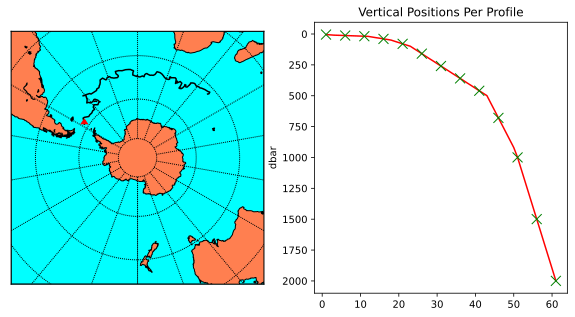

In [8]:
fig0=plt.figure(figsize=(10,5)) #decide size of the figure, unit?
ax0=fig0.add_subplot(121) #device the pasge into the left and the right halves
m=Basemap(projection='spstere',boundinglat=-30.,lon_0=180.,resolution='l') #남위30까지 표시, 남극 방향, resolution=l
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-80.,81.,20.)) #위도선
m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
m.drawmapboundary(fill_color='aqua') #물색깔
lx,ly=m(np.array(Lon),np.array(Lat))
m.plot(lx,ly,linewidth=1.5,color='k',marker='',markersize=5)
m.plot(lx[0],ly[0],linewidth=1.5,color='r',marker=10,markersize=7)
ax01=fig0.add_subplot(122)
ax01.set_ylabel('dbar')
plt.plot(np.arange(1,66),ds.pres[0,:], color='r')
plt.plot(np.arange(1,66,5),ds.pres[0,::5],marker="x",markersize=10,linestyle='none', color='g')
plt.ylim(plt.ylim()[::-1])
ax01.set_title('Vertical Positions Per Profile')
plt.show()

# 과제 01. in-situ temp를 conservative temp로 바꾸고 각각을 같은 판넬에 플롯하시오. 

# Exercise 01. Convert in-situ temperature to conservative temp and plot the conservative temp and in-situ temperature on the same panel for comparison

In [9]:
gsw.conversions.CT_from_t #(salinity, in-situ-temp, press)

<function gsw._wrapped_ufuncs.CT_from_t(SA, t, p)>

여기까진 힌트로 주어졌던 걸로 기억함. gsw.conversions.CT_from_t 함수에 salinity, in-situ-temp, pressure를 집어넣으면 알아서 반환해줌. 

cds라는 변수에 집어넣고 확인해보자. 

In [10]:
cds=gsw.conversions.CT_from_t(ds.psal[0,:],ds.temp[0,:],ds.pres[0,:])
cds

array([ 2.91535036,  2.91721935,  2.84901668,  2.84194844,  2.83189169,
        2.82784244,  2.7747506 ,  2.67956973,  2.66348077,  2.58032378,
        2.55924886,  2.55319223,  2.51887987,  2.46155942,  2.40527132,
        2.32197127,  1.7753464 ,  0.96366849,  0.51498735, -0.15053345,
       -0.48596225, -0.54936597, -0.62669609, -0.84731184, -0.87102038,
       -0.4692599 , -0.03676699, -0.11751695,  0.40644532,  1.09961732,
        1.33191895,  1.37962426,  1.73622704,  1.88849718,  2.10643827,
        2.08028109,  2.06205493,  2.04480651,  2.04456145,  2.04233405,
        2.02213472,  2.01584686,  2.12199306,  2.07340864,  2.05248676,
        2.02368068,  2.01873986,  1.99981858,  1.97690266,  1.94605101,
        1.90190977,  1.75327867,  1.65036231,  1.58598148,  1.48102172,
        1.45401783,  1.37959749,  1.3346092 ,  1.26104158,  1.18937622,
        1.10971939,         nan,         nan,         nan,         nan])

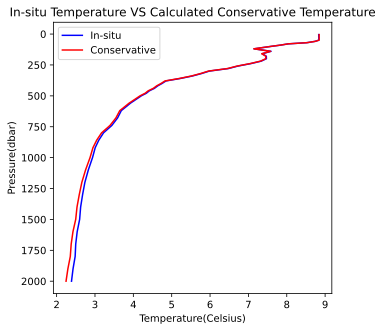

In [11]:
plt.figure(figsize=(5,5))
plt.plot(ds.temp[154,:],ds.pres[154,:], color='b', label='In-situ')
plt.plot(gsw.conversions.CT_from_t(ds.psal[154,:],ds.temp[154,:],ds.pres[154,:]),ds.pres[154,:], color='r', label='Conservative')
plt.ylim(plt.ylim()[::-1])
plt.title('In-situ Temperature VS Calculated Conservative Temperature')
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Pressure(dbar)")
plt.legend(loc=2)
plt.show()

### 번외. xarray에 있는 위치별 수직 프로파일을 모두 출력하기. (서버와 클라이언트에 큰 부하를 줌)

In [ ]:
for i in range(1,174):
    plt.figure(figsize=(10,10))
    plt.plot(ds.temp[i,:],ds.pres[i,:], color='b', label='In-situ')
    plt.plot(gsw.conversions.CT_from_t(ds.psal[i,:],ds.temp[i,:],ds.pres[i,:]),ds.pres[i,:], color='r', label='Conservative')
    plt.ylim(plt.ylim()[::-1])
    plt.title('In-situ Temperature VS Calculated Conservative Temperature')
    plt.xlabel("Temperature(Celsius)")
    plt.ylabel("Pressure(dbar)")
    plt.legend(loc=2)
    plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(ds.temp[154,:],ds.pres[154,:], color='b', label='In-situ')
plt.plot(gsw.conversions.CT_from_t(ds.psal[154,:],ds.temp[154,:],ds.pres[154,:]),ds.pres[154,:], color='r', label='Conservative')
plt.ylim(plt.ylim()[::-1])
plt.title('In-situ Temperature VS Calculated Conservative Temperature')
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Pressure(dbar)")
plt.legend(loc=2)
plt.plot()

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(ds.temp[154,:],ds.pres[154,:], color='b', label='In-situ')
plt.plot(gsw.conversions.CT_from_t(ds.psal[154,:],ds.temp[154,:],ds.pres[154,:]),ds.pres[154,:], color='r', label='Conservative')
plt.ylim(plt.ylim()[::-1])
plt.title('In-situ Temperature VS Calculated Conservative Temperature')
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Pressure(dbar)")
plt.legend(loc=2)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ds.temp[154,:],ds.pres[154,:], color='b', label='In-situ')
plt.plot(gsw.conversions.CT_from_t(ds.psal[154,:],ds.temp[154,:],ds.pres[154,:]),ds.pres[154,:], color='r', label='Conservative')
plt.ylim(plt.ylim()[::-1])
plt.title('In-situ Temperature VS Calculated Conservative Temperature')
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Pressure(dbar)")
plt.legend(loc=2)

plt.plot()

In [ ]:
for i in range(0,173):
    fig0=plt.figure(figsize=(10,5)) #decide size of the figure, unit?
    ax0=fig0.add_subplot(121) #device the pasge into the left and the right halves

    m=Basemap(projection='spstere',boundinglat=-30.,lon_0=180.,resolution='l') #남위30까지 표시, 남극 방향, resolution=l
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-80.,81.,20.)) #위도선
    m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
    m.drawmapboundary(fill_color='aqua') #물색깔
    lx,ly=m(np.array(Lon),np.array(Lat))
    m.plot(lx,ly,linewidth=1,color='k',marker='',markersize=5)
    m.plot(lx[i],ly[i],linewidth=1.5,color='r',marker="x",markersize=7)

    ax01=fig0.add_subplot(122)
    ax01.set_ylabel('dbar')
    plt.plot(ds.temp[i,:],ds.pres[i,:], color='b', label='In-situ')
    plt.plot(gsw.conversions.CT_from_t(ds.psal[i,:],ds.temp[i,:],ds.pres[i,:]),ds.pres[i,:], color='r', label='Conservative')
    plt.ylim(plt.ylim()[::-1])
    ax01.set_title('Vertical Positions Per Profile')
    plt.show()